## Exercise 01: 用量子位元表示一個八位元整數. 

In [2]:
%matplotlib inline
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *

# Loading your IBM Q account(s)
provider = IBMQ.load_account()

/anaconda3/envs/qiskitenv/lib/python3.7/site-packages/qiskit/providers/ibmq/ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


In [3]:
from qiskit.tools.monitor import backend_overview
from qiskit.tools.monitor import job_monitor
from qiskit import *
import numpy as np
import matplotlib.pyplot as plt

In [107]:
from qiskit import Aer
sim_backend = Aer.get_backend('qasm_simulator')

In [115]:
# 把整數換成二進位字串
def int_to_bit(N):
    xls=[]
    while N>0:
        b=N%2
        xls.append(b)
        N=N//2
    xls.reverse()
    return xls

In [116]:
# n為最多的位元數目 
n=8
N=np.random.randint(0,2**n-1)

In [117]:
#把高位補零
xls=int_to_bit(N)
while len(xls)<n:
    xls.insert(0,0)
print(N,xls)

172 [1, 0, 1, 0, 1, 1, 0, 0]


0 0
1 0
2 1
3 1
4 0
5 1
6 0
7 1


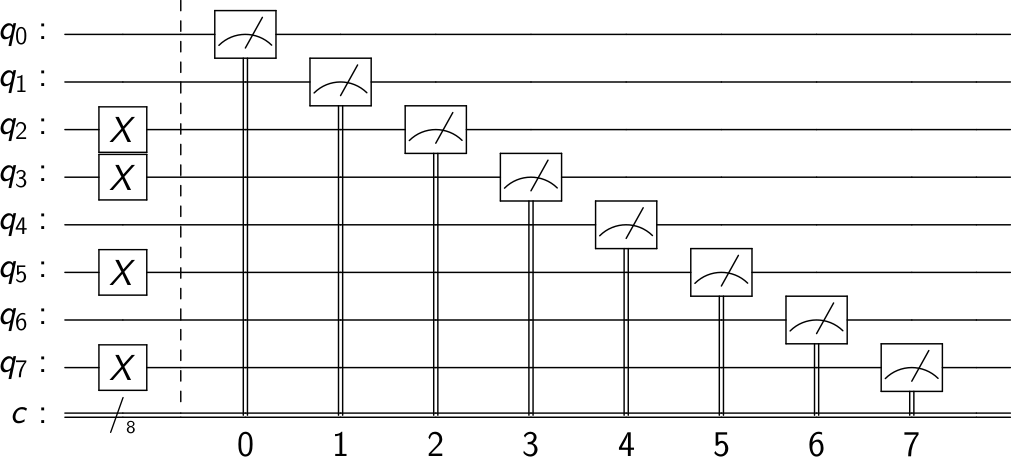

In [119]:
#建構量子電路
q=QuantumRegister(n,name='q')
c=ClassicalRegister(n,name='c')
circ=QuantumCircuit(q,c)
xls.reverse()
for i,item in enumerate(xls):
    print(i,item)
    if item:
        circ.x(q[i])
circ.barrier()
circ.measure(q,c)
circ.draw(output='latex')


In [120]:
#執行量子電路
job = execute(circ,backend=sim_backend,shots=1024)
job_monitor(job)
result = job.result()
counts = result.get_counts()

Job Status: job has successfully run


{'10101100': 1024}


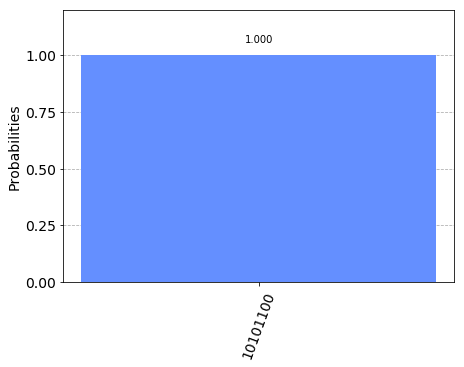

In [122]:
print(counts)
plot_histogram(counts)

## 挑戰題：創建一個量子電路可等機率表示 0和5. 
### hint: 需要兩個兩子位元，利用H gate產生疊加態
